<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [56]:
# Utilice este espacio para escribir el código.

# librerias
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import os

# Descargar los datos utilizando fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.4)

# Se imprimen los nombres de cada uno de los personajes
for name in lfw_people.target_names:
    print(name)

# Array con imágenes
images = lfw_people.images
# Array con etiquetas
labels = lfw_people.target
# Array con nombres
target_names = lfw_people.target_names

# Se guarda en el datafolder
for i, (image, label) in enumerate(zip(images, labels)):
    person_name = target_names[label].replace(" ", "_")
    numpy_filename = f"data/{person_name}_{i}.npy"
    np.save(numpy_filename, image)  # Save the image as a numpy array

print("Guardadas todas las imágenes para individuos con al menos 25 imagénes")

Alejandro Toledo
Alvaro Uribe
Andre Agassi
Ariel Sharon
Arnold Schwarzenegger
Bill Clinton
Colin Powell
David Beckham
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Gloria Macapagal Arroyo
Gray Davis
Guillermo Coria
Hans Blix
Hugo Chavez
Jack Straw
Jacques Chirac
Jean Chretien
Jennifer Capriati
John Ashcroft
John Negroponte
Juan Carlos Ferrero
Junichiro Koizumi
Kofi Annan
Laura Bush
Lleyton Hewitt
Luiz Inacio Lula da Silva
Mahmoud Abbas
Megawati Sukarnoputri
Nestor Kirchner
Recep Tayyip Erdogan
Ricardo Lagos
Roh Moo-hyun
Rudolph Giuliani
Serena Williams
Silvio Berlusconi
Tom Daschle
Tom Ridge
Tony Blair
Vicente Fox
Vladimir Putin
Guardadas todas las imágenes para individuos con al menos 25 imagénes


### Procedimiento:

1. Se descarga la base de datos de imágenes usando la función fetch.
2. Se crea una función que guarda las imágenes como un numpy array considerando el nombre de los individuos con imágenes.

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes.

Dimensiones del array de imagenes
3
Longitud en las dimensiones del array de imagenes
(2588, 50, 37)
Min, Max, promedio
0.0
255.0
130.05396
Dimensiones de una sola imagen
Dimensión: 50 x 37


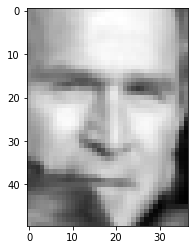

In [69]:
# Dimensiones del array de imagenes:
print("Dimensiones del array de imagenes")
print(images.ndim)
print("Longitud en las dimensiones del array de imagenes")
print(images.shape)

print("Min, Max, promedio")
print(np.min(images))
print(np.max(images))
print(np.average(images))

# Intensidad de luz
images[0,:]
# Dimensiones de una sola imagen
print("Dimensiones de una sola imagen")
n,k= image.shape
print("Dimensión:", n, "x", k)

# Se grafica la imagen 
plt.imshow(image, cmap='gray')
plt.show()

#### Procedimiento:
1. Para describir los contenidos de la base usamos las dimensiones del array de numpy y estadísticas simples como el mínimo, máximo y el promedio.
2. Se verifica que es un objeto de tipo array manipulable en numpy y se comprueba que cada entrada contiene un número que indica la intensidad de la luz en cada punto de la imágen.
3. Cargada la imagen y verificado que es un array, verificamos la dimensión obteniendo 50x37 pixeles.
5. Se grafica con plt.imshow de Matplotlib puede usarse para graficar imágenes

#### Análisis:
1. El arreglo de numpy con las imágenes contiene 2.588 imágenes de individuos, cada una tiene unas dimensiones de 50x37 (al hacer el fetch usamos el parametro resize = 0.4). Cada una de las entradas corresponde a un valor numérico entre 0-255 que representa la intensidad de luz de cada pixel en la escala de grises. 

#### Conclusión:
1. Existen modos sencillos de representar imágenes como matrices, donde cada valor representa un pixel, a través de la intensidad de luz en este caso un color dentro de la escala de grises.  


A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

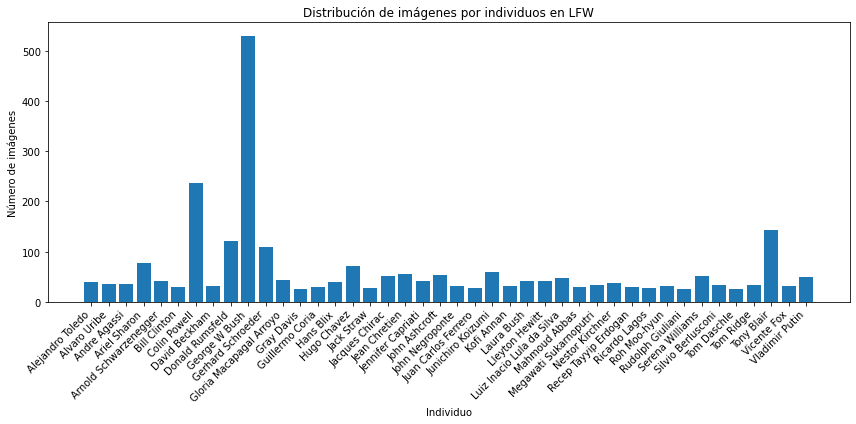

In [70]:
# Utilice este espacio para escribir el código.

# Obtener las etiquetas numéricas de los individuos
target = lfw_people.target

# Contar cuántas imágenes hay para cada individuo
unique_targets, counts = np.unique(target, return_counts=True)

# Obtener los nombres de los individuos a partir de las etiquetas
target_names = lfw_people.target_names

# Crear una gráfica de barras para mostrar la distribución
plt.figure(figsize=(12, 6))
plt.bar(target_names, counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Individuo')
plt.ylabel('Número de imágenes')
plt.title('Distribución de imágenes por individuos en LFW')
plt.tight_layout()

plt.show()

##### Procedimiento:
1. Se obtienen las etiquetas numéricas de los individuos.
2. Se hizo conteo de imágen por label.
3. Extraemos los nombres de los individuos por etiquetas
4. Se representa en forma de gráfica de barras.

#### Análisis y conclusión:
1. Las personas con más imagenes son George W Bush, Colin Powell, Donald Rumsfeld, Tony Blair.

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Imagenes que pertenecen a Serena Williams: 52


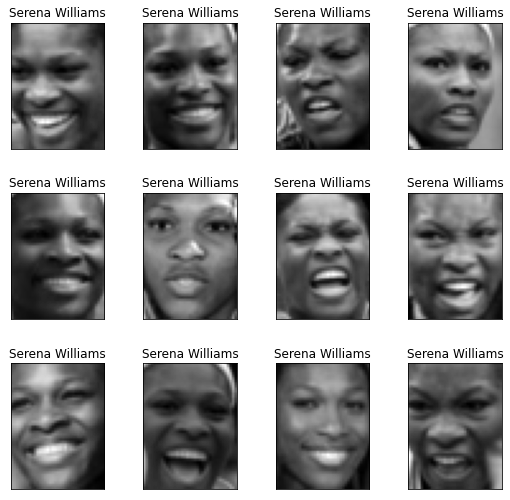

In [71]:
# Utilice este espacio para escribir el código.

# Definición de la galería de imágenes
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Buscamos en el target_names todas las imágnes de Serena Williams
serena_williams_index = list(lfw_people.target_names).index('Serena Williams')

# Extraemos las imagenes con sus labels en una variable llamada serena_images
serena_images = lfw_people.images[lfw_people.target == serena_williams_index]

# Serena Williams  `serena_images` variable
print(f"Imagenes que pertenecen a Serena Williams: {serena_images.shape[0]}")

# Se grafican las imagenes de SW.
serena_titles = ["Serena Williams"] * len(serena_images)
plot_gallery(serena_images, serena_titles, h=50, w=37)
plt.show()


##### Procedimiento:
1. En los target names se buscan todas las coincidencias para Serena Williams.
2. Se crea una variable separada para guardar las etiquetas e imágnes de Serena Williams.
3. Se generan las gráficas de cada imagen de Serena Williams en una galeria de imágenes. 

#### Análisis y conclusión:
1. En la base encontramos 52 imágenes de Serena Williams.

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

C:\Users\jrami\AppData\Local\Temp\ipykernel_18928\2629235407.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Xmean = df.drop(columns=[ 'label']).mean(axis=0)
C:\Users\jrami\AppData\Local\Temp\ipykernel_18928\2629235407.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  person_average = person_images.mean(axis=0).to_numpy()
C:\Users\jrami\AppData\Local\Temp\ipykernel_18928\2629235407.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  person_average = person_images.mean(axis=0).

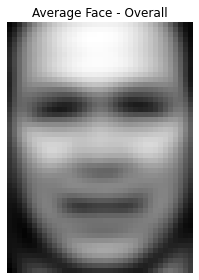

In [72]:
# Utilice este espacio para escribir el código.
import pandas as pd
# Número de muestras 
n_samples, h, w = lfw_people.images.shape

images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = lfw_people.data
X = pd.DataFrame(X)

y = lfw_people.target
y = pd.DataFrame(y, columns=['label']) 

df = y.join(X)

# Mapear los índices de target_names a los valores de etiqueta en el DataFrame
y['name'] = y['label'].apply(lambda x: target_names[x])
df = y.join(X)

# Se cálcula el promedio.
Xmean = df.drop(columns=[ 'label']).mean(axis=0)

# Calcular el promedio por persona -- Por ejercicio Mental
average_faces_per_person = {}
for person_label in df['label'].unique():
    person_name = target_names[person_label]
    person_images = df[df['label'] == person_label].drop(columns=['label'])
    person_average = person_images.mean(axis=0).to_numpy()
    average_faces_per_person[person_name] = person_average

plt.figure(figsize=(4, 4))
plt.imshow(Xmean.values.reshape((h, w)), cmap='gray')
plt.title("Average Face - Overall")
plt.axis('off')
plt.tight_layout()
plt.show()



Procedimiento
1. Se convierte el array en un dataframe de pandas para facilitar su manipulación.
2. Se "aplastan" los datos convirtiendo cada imagen en una fila.
3. Calculamos el promedio de cada columna, de manera que estamos haciendo el promedio de los pixeles que tienen la misma posición en las distintas imágenes.

Análisis y Conclusiones 
1. El rostro promedio es una mezcla de las caracteristicas comunes de los rostros de todas las imágenes, simplemente promediando la intensidad de gris de cada pixel se logra obtener un rostro genérico que parece describir a un hombre blanco de edad media, lo que corresponde con la mayoria de los individuos incluidos en la muestra.



#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

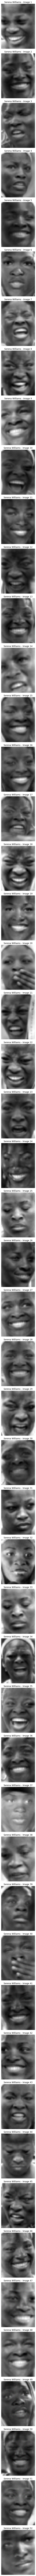

In [73]:
# Utilice este espacio para escribir el código.

# Quitar el "rostro promedio" a las imágenes
demean = df.drop(columns=['label', 'name']) - Xmean

# Agregar de nuevo las columnas 'label' y 'name'
demean['label'] = df['label']
demean['name'] = df['name']

# Asegurar que las columnas 'label' y 'name' estén en su posición original
demean = demean[['label', 'name'] + [col for col in demean.columns if col not in ['label', 'name']]]

# Obtener las imágenes de Serena Williams del DataFrame demean
serena_demean_images = demean[demean['name'] == 'Serena Williams'].drop(columns=['label', 'name'])

# Obtener el número de imágenes de Serena Williams
num_images = serena_demean_images.shape[0]

# Crear una figura para mostrar las imágenes de Serena Williams
fig, axs = plt.subplots(num_images, 1, figsize=(3, 4*num_images))

# Graficar las imágenes de Serena Williams
for i, (_, serena_demean_image) in enumerate(serena_demean_images.iterrows()):
    axs[i].imshow(serena_demean_image.to_numpy().reshape((h, w)), cmap='gray')
    axs[i].set_title(f"Serena Williams - Image {i+1}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Procedimiento
1. Con el array de imágenes convertido en dataframe en pandas, restamos la media a cada columna.
2. Nos aseguramos de no perder la información de los encabezados después de esta operación.
3. Filtramos las imágenes que corresponden a Serena Williams y procedemos a graficarlas.

Análisis y Conclusiones 
1. Al restar el rostro promedio, obtenemos imágenes extrañas, donde se acentuan partes de las imágenes con características que diferencian al individuo de los demás. 


#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [ ]:
# Utilice este espacio para escribir el código.
from scipy.linalg import svd #pueden explorar con sklearn
U,S,Vt = svd(X)

# Retener solo los primeros 1000 valores singulares
K = 1000
U_k = U[:, :K]
S_k = np.diag(S[:K])
Vt_k = Vt[:K, :]

# Calcular la proporción de varianza representada por los primeros 1000 valores singulares
total_variance = np.sum(S**2)
k_variance = np.sum(S_k**2)
variance_ratio = k_variance / total_variance

print(f"Proporción de varianza representada por los primeros 1000 valores singulares: {variance_ratio:.4f}")

Proporción de varianza representada por los primeros 1000 valores singulares: 0.9999


In [ ]:
n,k=X .shape

S2= np.resize(S,[n,1])*np.eye(n,k) #ponemos los valores singulares en una matriz diagonal

l = 1000

reconstructed=np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))
reconstructed = pd.DataFrame(reconstructed)
reconstructed

,0,1,2,3,4,5,6,7,8,9,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,32.159746,42.501301,48.914162,72.998894,95.444684,105.446583,104.427482,103.609394,103.065192,92.865943,...,22.326988,21.609561,23.694507,24.404377,28.255401,28.959214,32.220849,33.635397,36.016287,36.561802
1,52.212749,57.349146,65.993446,71.425919,78.240481,84.817341,92.036250,98.089923,104.726947,112.245058,...,73.851796,104.377007,152.407848,214.292905,237.160599,233.490752,229.147288,234.520830,219.023134,174.260378
2,95.572745,103.929149,137.414738,159.358125,165.858818,172.546907,176.486956,179.649065,184.715119,189.599797,...,246.755275,251.508200,252.935033,248.729975,170.264241,34.503247,20.812941,21.833847,21.339763,21.172496
3,189.270031,176.825294,137.387001,114.965869,136.771760,173.136241,191.689152,201.743758,212.561209,219.331855,...,61.258902,78.706577,94.333078,101.894255,116.641145,121.058186,127.083738,129.521022,67.717395,19.380375
4,98.376196,122.697898,154.670435,170.413282,169.618207,152.844951,140.447057,133.432023,133.536000,129.314704,...,16.192374,12.424997,13.640180,18.192806,20.875853,22.972162,11.897165,16.318788,19.162240,20.296004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,67.367463,79.212504,94.339428,96.625512,103.601300,121.152082,143.117688,157.195415,164.047374,175.770235,...,47.885552,51.751829,53.856339,50.500639,53.415626,61.302235,63.899014,64.058089,62.119128,58.920968
2584,96.933823,104.155599,103.869308,129.308465,156.199286,163.859487,163.251098,166.330423,165.114508,171.334349,...,84.124229,124.287724,146.611027,151.454375,148.663672,142.723005,132.891033,119.070925,72.772973,21.815861
2585,45.606284,61.701271,84.584178,99.592166,101.594402,125.267681,148.664609,171.120789,182.800494,179.670145,...,73.907311,63.795186,56.241202,54.839345,61.740594,60.412379,70.689265,117.080458,170.239607,185.183747
2586,43.165662,61.805129,81.358055,106.080212,120.744060,128.574177,138.882249,147.006182,147.407864,147.229663,...,119.596984,155.191248,192.551765,206.189954,213.719115,221.779346,224.513812,209.231465,215.249703,238.231886


Procedimiento
1. Usamos SVD de scipy, por lo que necesitamos importarlo de esta libreria.
2. Aplicamos SVD con 1000 valores singulares (K=1000)
3. Calculamos la proporción de la varianza explicada. Usando la diagonal de la matriz S.
4. Se reconstruyen los arreglos de cada imagen a partir de los valores singulares escogidos (1000 pixeles por imagen).

Análisis y conclusiones
1. A partir del uso de SVD y tomando 1000 valores singulares se explica el 99.99% de la varianza de los datos originales, reduciendo la dimensión de 1850 px a 1000 px por imagen (50x37=1850). 

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [ ]:
# Utilice este espacio para escribir el código.
# Número de valores singulares
l = 1000

# Obtener los primeros l componentes principales y valores singulares
U_l = U[:, :l]
S_l = np.diag(S[:l])
Vt_l = Vt[:l, :]

# Obtener las imágenes de Serena Williams
serena_images = df[df['name'] == 'Serena Williams'].drop(columns=['label', 'name'])

# Convertir las imágenes de Serena Williams a una matriz
serena_images_matrix = serena_images.to_numpy()

# Aplicar la reconstrucción utilizando los componentes principales y el rostro promedio
reconstructed_images = np.dot(U_l, np.dot(S_l, Vt_l)) + Xmean.to_numpy()

# Crear un DataFrame con todas las imágenes reconstruidas
reconstructed_df = pd.DataFrame(reconstructed_images, columns=df.drop(['label', 'name'], axis=1).columns)

# Agregar las columnas 'label' y 'name' al DataFrame reconstruido
reconstructed_df['label'] = df['label']
reconstructed_df['name'] = df['name']

# Crear un DataFrame con las imágenes reconstruidas de Serena Williams
reconstructed_serena_df = reconstructed_df[reconstructed_df['name'] == 'Serena Williams'].copy()
reconstructed_serena_df=reconstructed_serena_df.drop(['label', 'name'], axis=1)


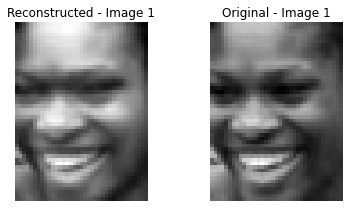

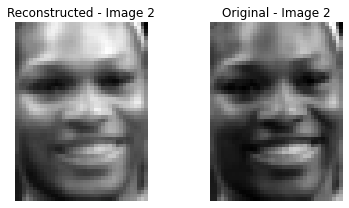

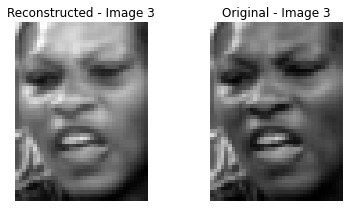

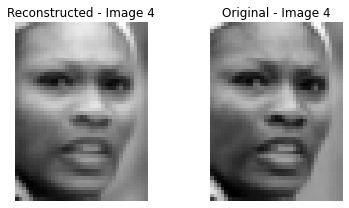

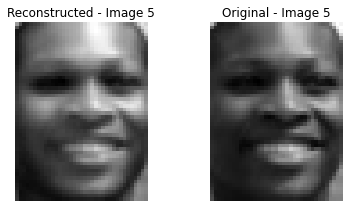

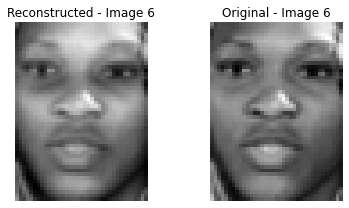

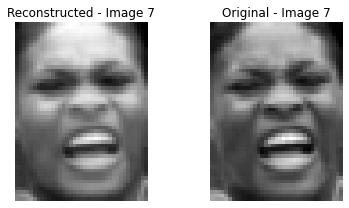

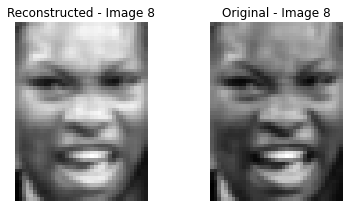

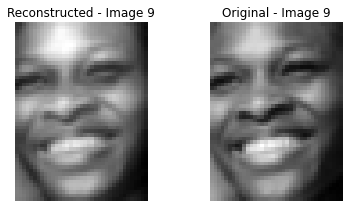

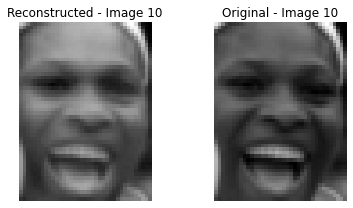

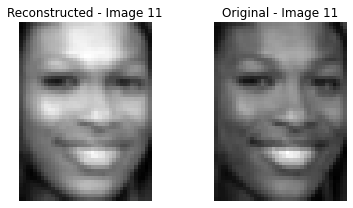

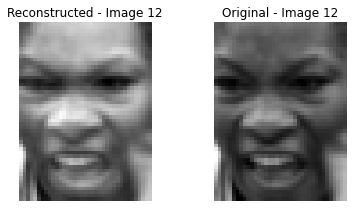

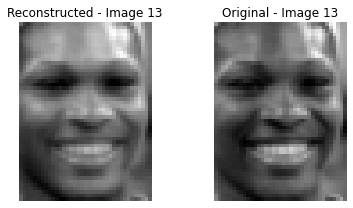

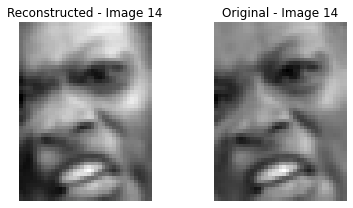

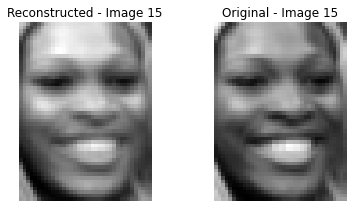

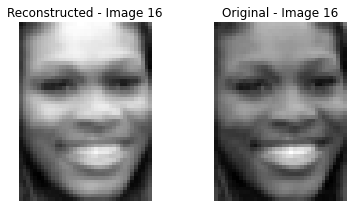

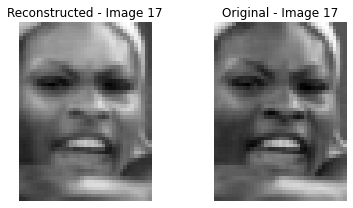

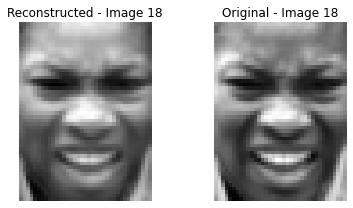

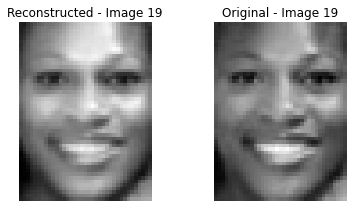

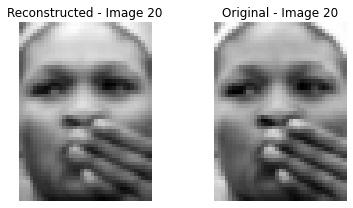

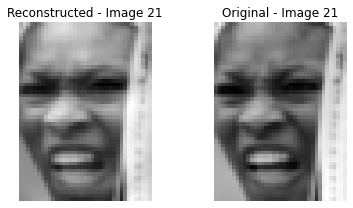

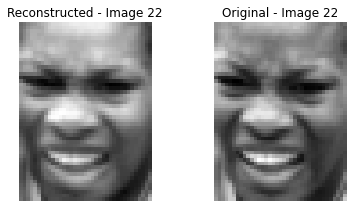

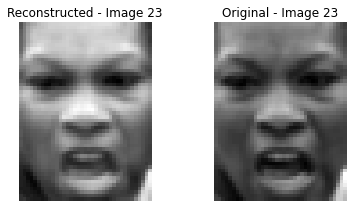

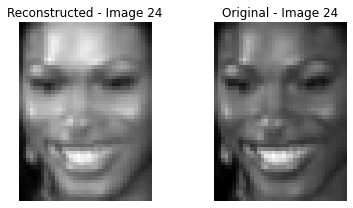

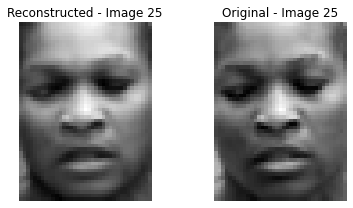

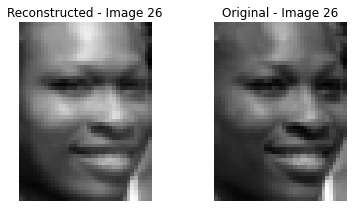

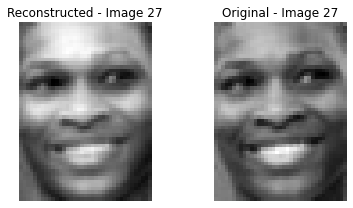

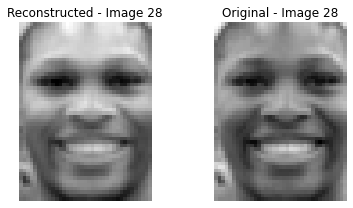

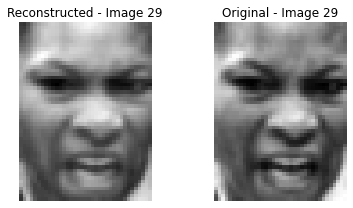

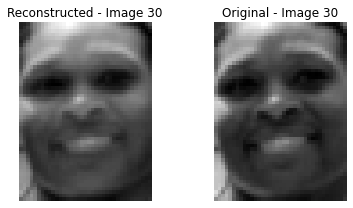

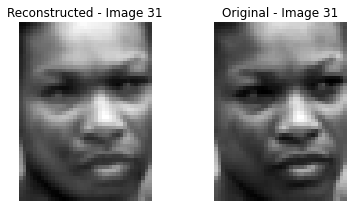

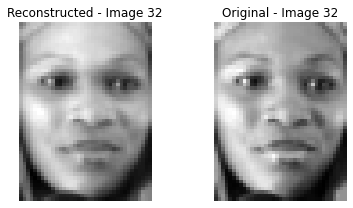

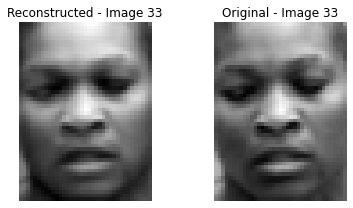

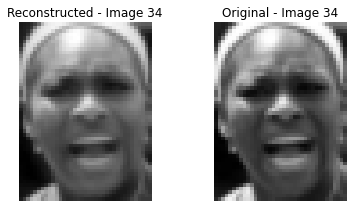

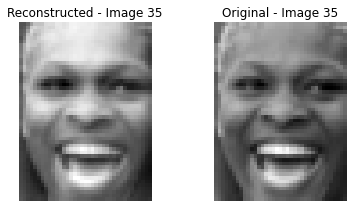

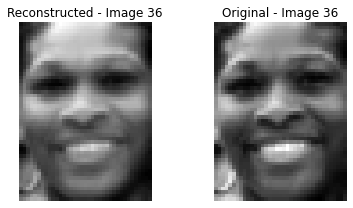

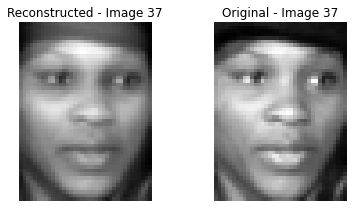

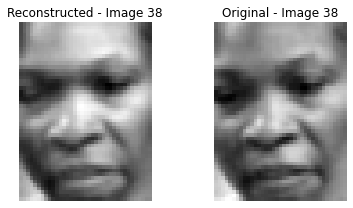

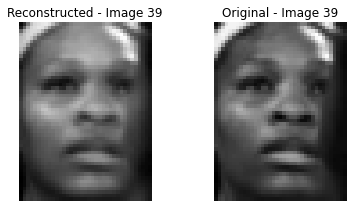

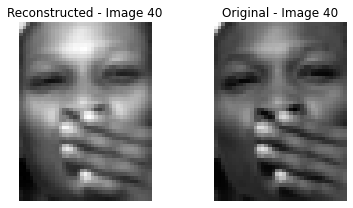

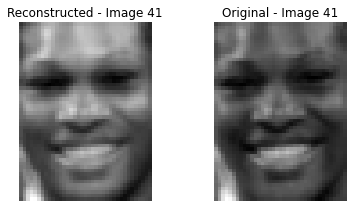

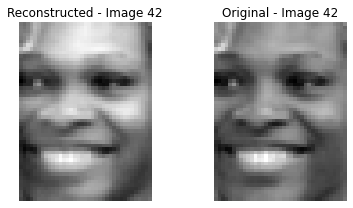

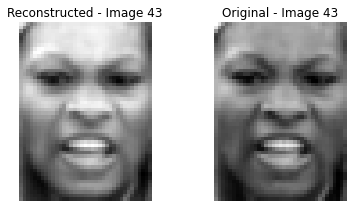

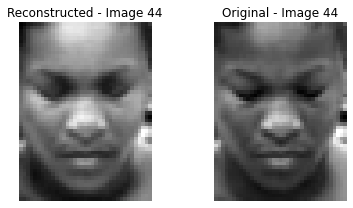

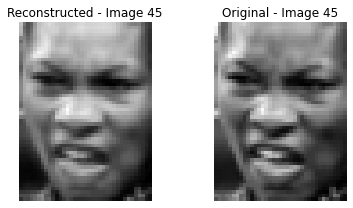

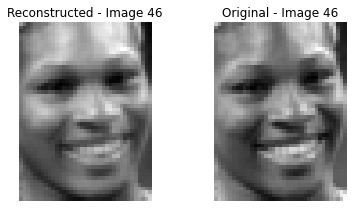

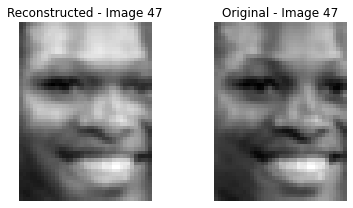

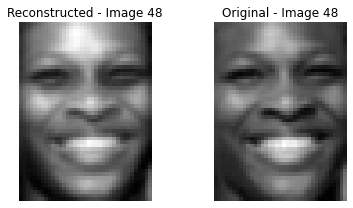

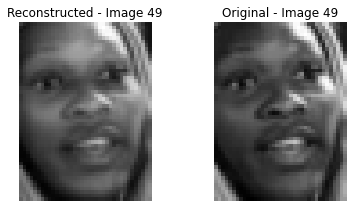

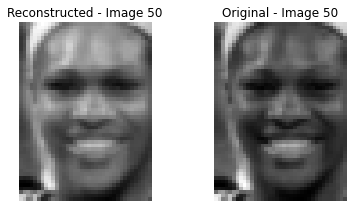

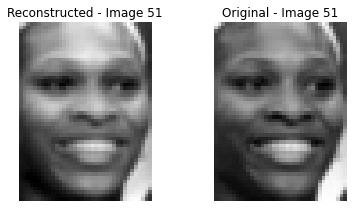

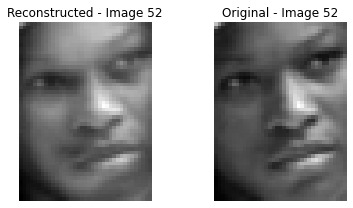

In [ ]:
# Mostrar las imágenes originales y reconstruidas de Serena Williams

# Obtener el número de imágenes de Serena Williams
num_images = reconstructed_serena_df.shape[0]

# Iterar a través de las imágenes y graficarlas
for i in range(num_images):
    reconstructed_image = reconstructed_serena_df.iloc[i, :].to_numpy().reshape((h, w))
    original_image = serena_images.iloc[i, :].to_numpy().reshape((h, w))
    
    plt.figure(figsize=(6, 3))
    
    plt.subplot(1, 2, 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed - Image {i+1}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Original - Image {i+1}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Procedimiento
1. Obtener los primeros 1000 valores singulares.
2. Obtener las imágenes de Serena Williams, luego convertirlas a una matriz de `numpy`
3. Aplicar la reconstrucción utilizando los componentes principales y el rostro promedio.
4. Crear un Dataframe con todas las imágenes reconstruidas, luego graficar estas imágenes reconstruidas y las originales.

Análisis y Conclusiones 
1. De acuerdo a las gráficas comparativas se evidencia que las imágenes reconstruidas y las originales son prácticamente iguales, las figuras se distinguen con claridad.

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [ ]:
# Utilice este espacio para escribir el código.
# Crear la variable binaria
df['Es_George_Bush'] = (df['name'] == 'George W Bush').astype(int)

# Mostrar las primeras filas del DataFrame con la nueva variable
df.head()

,label,name,0,1,2,3,4,5,6,7,...,1841,1842,1843,1844,1845,1846,1847,1848,1849,Es_George_Bush
0,10,Gerhard Schroeder,32.000000,41.666668,50.333332,71.666664,95.333336,106.333336,104.000000,104.666664,...,21.333334,23.333334,24.666666,27.666666,29.333334,31.666666,34.333332,35.333332,36.666668,0
1,9,George W Bush,52.333332,57.000000,64.666664,71.666664,78.666664,84.333336,91.666664,98.666664,...,103.666664,151.000000,214.333328,238.000000,232.000000,229.666672,234.666672,219.333328,173.666672,1
2,41,Vladimir Putin,95.000000,103.333336,137.333328,160.000000,165.000000,174.666672,176.000000,178.333328,...,252.000000,252.666672,249.666672,169.666672,34.333332,21.333334,21.000000,22.000000,21.000000,0
3,6,Colin Powell,189.666672,178.333328,137.333328,115.000000,135.333328,172.333328,194.333328,201.666672,...,79.666664,93.333336,103.000000,117.000000,121.000000,127.000000,130.000000,67.000000,19.333334,0
4,9,George W Bush,97.666664,124.000000,154.000000,171.000000,168.333328,151.000000,140.333328,134.333328,...,13.666667,13.000000,19.000000,20.666666,22.666666,12.333333,17.000000,19.333334,20.000000,1


Se crea a través de un condicional la columna Es_George_Bush 

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [ ]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import train_test_split

# Dividir los datos en bases de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label', 'name', 'Es_George_Bush'], axis=1), df['Es_George_Bush'], test_size=0.2, random_state=10101)

Se crea la separación a través del uso de la librería de SkLearn con los parametros indicados

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [ ]:
# Utilice este espacio para escribir el código.
from scipy.linalg import svd

# Recentrar las matrices de entrenamiento y prueba
X_train_centered = X_train - X_train.mean()
X_test_centered = X_test - X_test.mean()

# Realizar la descomposición en valores singulares (SVD) en la base de entrenamiento
U_train, S_train, Vt_train = svd(X_train_centered)

# Realizar la descomposición en valores singulares (SVD) en la base de prueba
U_test, S_test, Vt_test = svd(X_test_centered)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [ ]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# Utilice este espacio para escribir el código restante.

# Número de componentes principales a utilizar
k = 1000

# Obtener los primeros k componentes principales y valores singulares
U_train_k = U_train[:, 0:k]
Vt_train_k = Vt_train[0:k, :]

U_test_k = U_test[:, 0:k]
Vt_test_k = Vt_test[0:k, :]

n1,k1=X_train.shape
n2,k2=X_test.shape

S2_train_k= np.resize(S_train,[n1,1])*np.eye(n1,k2)
S2_test_k= np.resize(S_test,[n2,1])*np.eye(n2,k2)

S2_train_k = S2_train_k[0:k,0:k]
S2_test_k = S2_test_k[0:k,0:k]

# Reconstruir las matrices con los k componentes principales
X_train_reconstructed = np.dot(U_train_k, np.dot(S2_train_k, Vt_train_k))
X_test_reconstructed = np.dot(U_test_k, np.dot(S2_test_k, Vt_test_k))
# Construir el modelo logístico
Modelo_Logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)

# Entrenar el modelo logístico en la base de entrenamiento reconstruida
Modelo_Logistico.fit(X_train_reconstructed, y_train)

# Predecir las etiquetas en la base de prueba reconstruida
y_pred = Modelo_Logistico.predict(X_test_reconstructed)

# Calcular el porcentaje de imágenes de George W Bush clasificadas correctamente
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Porcentaje de imágenes de George W Bush clasificadas correctamente: {accuracy * 100:.2f}%")

Porcentaje de imágenes de George W Bush clasificadas correctamente: 74.32%


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definir los valores de k a explorar
k_values = [10, 50, 100, 200, 500, 1000]

S2_train_k= np.resize(S_train,[n1,1])*np.eye(n1,k2)
S2_test_k= np.resize(S_test,[n2,1])*np.eye(n2,k2)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

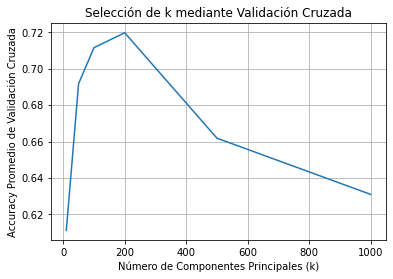

In [ ]:
# Realizar búsqueda de hiperparámetros utilizando validación cruzada con GridSearchCV
param_grid = {'C': [1.0], 'solver': ['sag'], 'max_iter': [1000]}
grid_search_results = {}

for k in k_values:
    # Reconstruir las matrices con los k componentes principales
    X_train_reconstructed = np.dot(U_train[:, :k], np.dot(S2_train_k[0:k,0:k], Vt_train[:k, :]))
    X_test_reconstructed = np.dot(U_test[:, :k], np.dot(S2_test_k[0:k,0:k], Vt_test[:k, :]))
    
    # Construir el modelo logístico
    modelo_logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
    
    # Realizar búsqueda de hiperparámetros
    grid_search = GridSearchCV(estimator=modelo_logistico, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_reconstructed, y_train)
    
    # Almacenar los resultados en el diccionario
    grid_search_results[k] = grid_search

# Graficar los resultados de la validación cruzada
mean_test_scores = [grid_search_results[k].best_score_ for k in k_values]
plt.plot(k_values, mean_test_scores)
plt.xlabel('Número de Componentes Principales (k)')
plt.ylabel('Accuracy Promedio de Validación Cruzada')
plt.title('Selección de k mediante Validación Cruzada')
plt.grid(True)
plt.show()

# Obtener el mejor valor de k encontrado
best_k = max(grid_search_results, key=lambda k: grid_search_results[k].best_score_)

In [ ]:
best_k

200

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).